# Data visualization and validation

In this notebook, we will visualize all the available data. In particular, all the data that will be used for sure in the project, but more data such as the ERA5 sea-level-pressure fields can be loaded and visualized, so please refer to the `sscode/` folder for more information. Again, all the functions / classes used in the notebooks are hosted and documented in the repository, so please refer to the code in case any doubt exists!!

```{note}
Nevertheless, the functions used and how they work will also be explained in this introductory first notebook
```

In [1]:
# common
import os, sys

# arrays
import numpy as np
import pandas as pd
import xarray as xr

# plotly
import plotly.graph_objects as go

# append sscode to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# custom
from sscode.data import Loader, load_moana_hindcast, load_predictor, \
    join_load_uhslc_tgs, load_moana_hindcast_ss
from sscode.plotting.data import plot_all_data
from sscode.config import default_location

# warnings
import warnings
warnings.filterwarnings('ignore')

DATA PATH /home/javitausia/Documentos/geocean-nz-ss/data


## Plot all available data

After a lot of preprocessing and data analysis work, the datasets that are going to be primary used for convenience reasons are:

* The Moana v2 hindcast as the storm surge hindcast predictand
* The CFSR sea-level-pressure fields and u10 and v10 wind components as the predictors (notice here that we also calculated the projected winds to a determined location in the islands, go to the end of this notebook to see results)
* Some [UHSLC](https://uhslc.soest.hawaii.edu/) tidal gauges as the "validators", although more tidal gauges from different resources / organizations might be also helpful

data format is available in the figure below:

```{figure} ../media/images/data-format.png
---
width: 600px
name: data-format
---
Main datasets format that will be used in all the available notebooks
```

and all this data is plotted in the figure below, using a plotting function located at `sscode/plotting/data.py` !!

## Load and validate the data

Below we use the **class Loader** to simultaneously load the three datasets that will be commonly used in all the notebooks. Notice that here, we say `plot=True`, but this parameter can be set to `False` to save time and space in our running notebooks. This class uses different loading funtions, and is hosted at `sscode/data.py`, where the `data_to_load` parameter accepts the following inputs:

```python
    loader_dict_options = {
        'predictor': ['cfsr','era_5'],
        'predictand': ['dac','moana','codec'],
        'validator': ['uhslc','privtgs','linz','other']
    }
```

Once the data is loaded, we validate the Moana v2 hindcast data ("moana") with the University of Hawaii tidal guages ("uhslc"), for the specified variables, in this case, the storm surge, the monthly mean-sea-level anomalies and the tide, obtaining very good results!!


 loading and managing atmospheric data... 


 resampling data to 1D... 


 loading the sea-level-pressure fields... 


 loading and calculating the winds... 



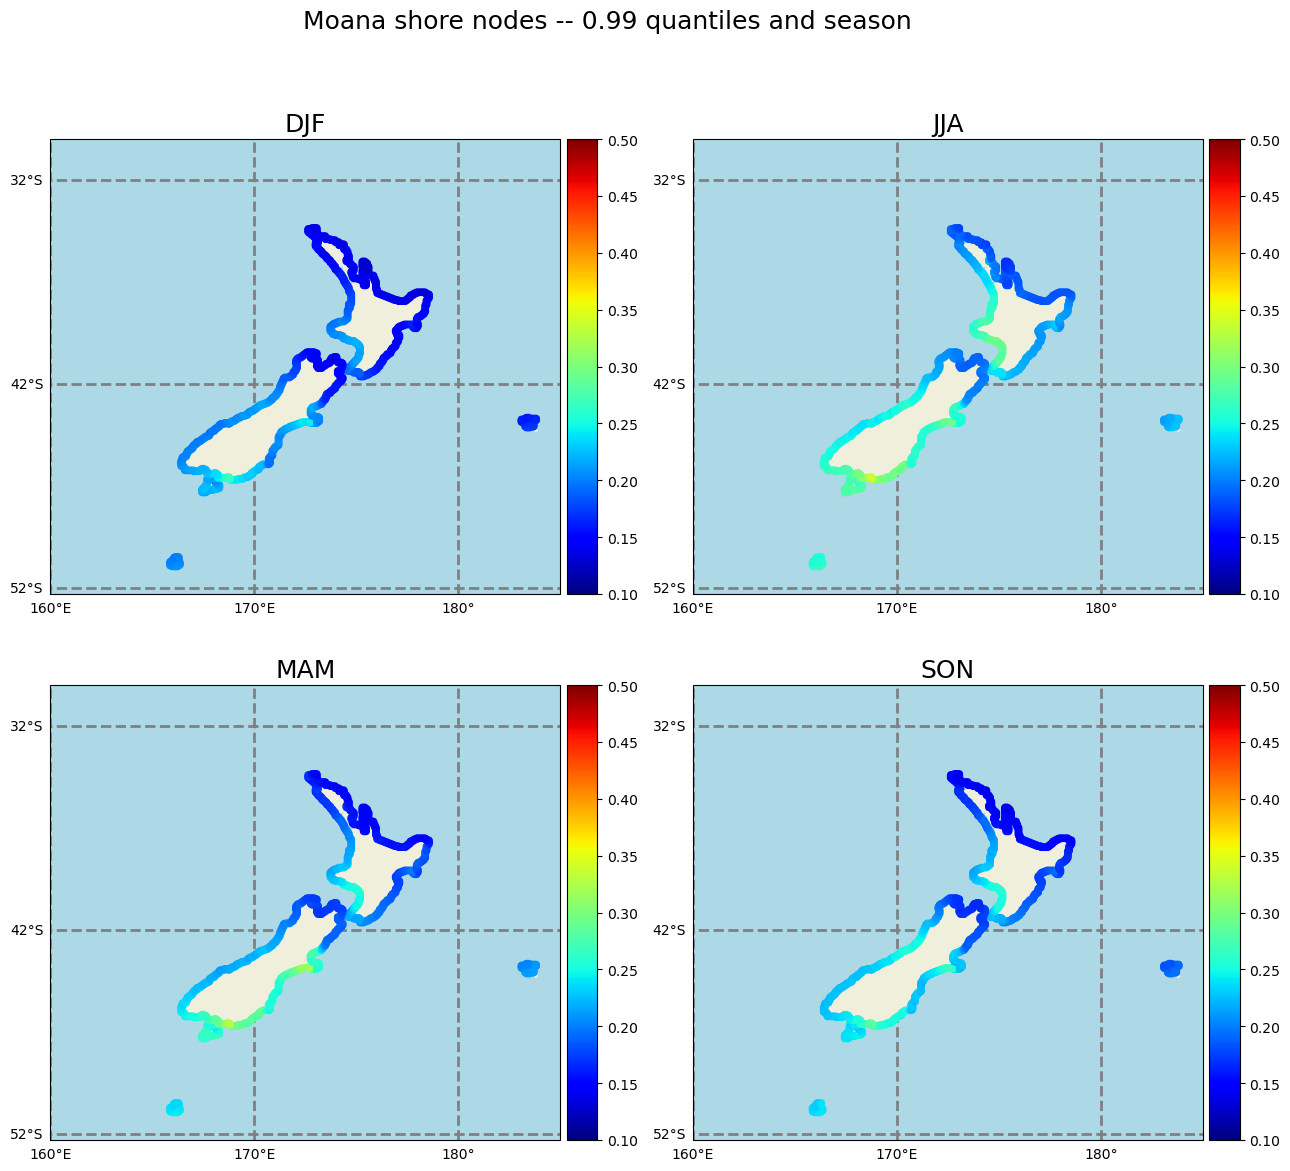


 loading and plotting the UHSLC tidal guages... 



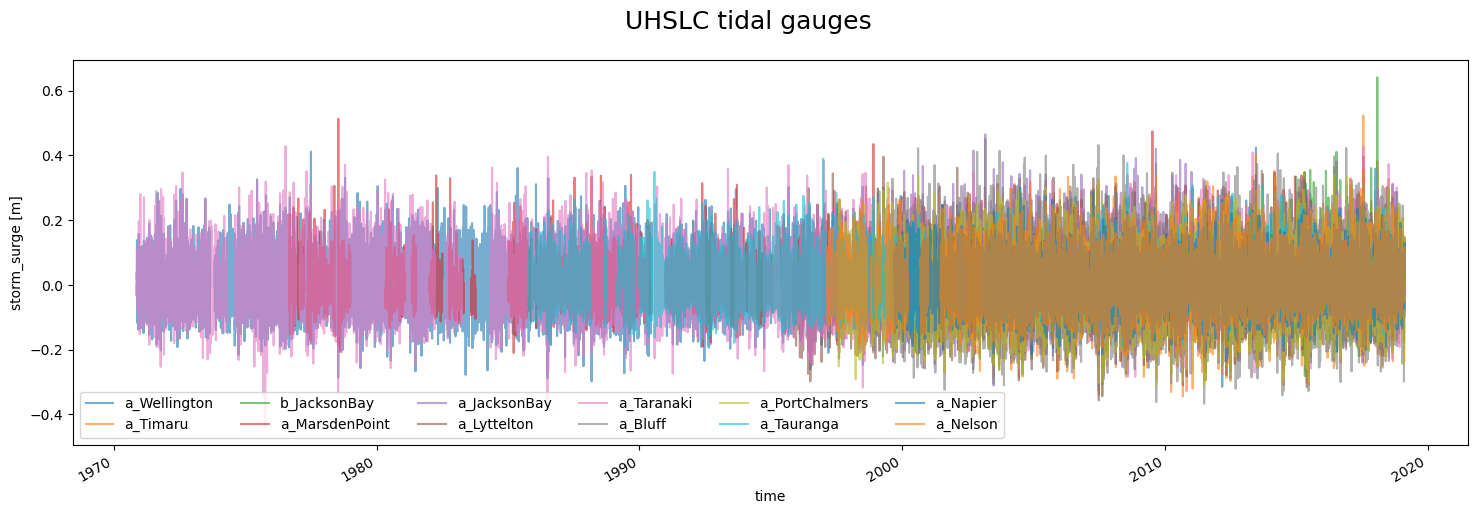

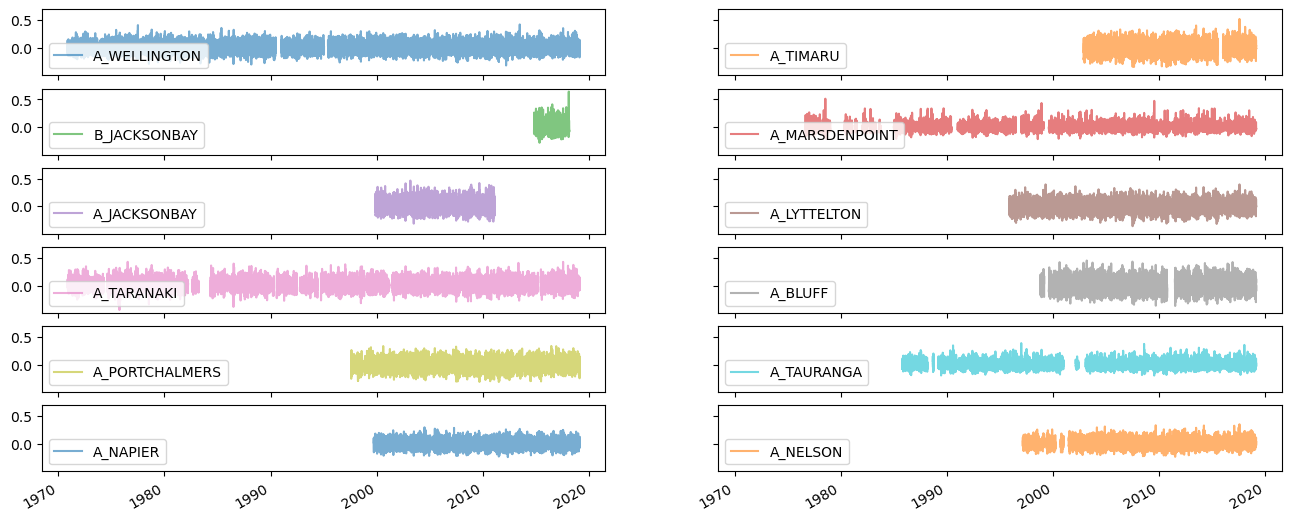


 Lets compare data in Moana v2 hindcast with UHSLC tgs!! 


 
 TGs to analyze are: 
 ['a_Wellington' 'a_Timaru' 'b_JacksonBay' 'a_MarsdenPoint' 'a_JacksonBay'
 'a_Lyttelton' 'a_Taranaki' 'a_Bluff' 'a_PortChalmers' 'a_Tauranga'
 'a_Napier' 'a_Nelson'] 


 which correspond to 
 [689, 328, 393, 1327, 393, 480, 999, 116, 224, 1124, 949, 708] 
 in Moana v2 hindcast 


 calculated min distances (km) in Moana v2 hindcast to UHSLC tgs: 
 [10.091858550595918, 5.125532152668501, 6.897621081071355, 7.807937095794992, 6.897621081071355, 8.749086655427975, 0.7284939428839287, 2.827544577707935, 8.837335750916106, 4.69880874581877, 1.8441234559361162, 4.255617965385927] 



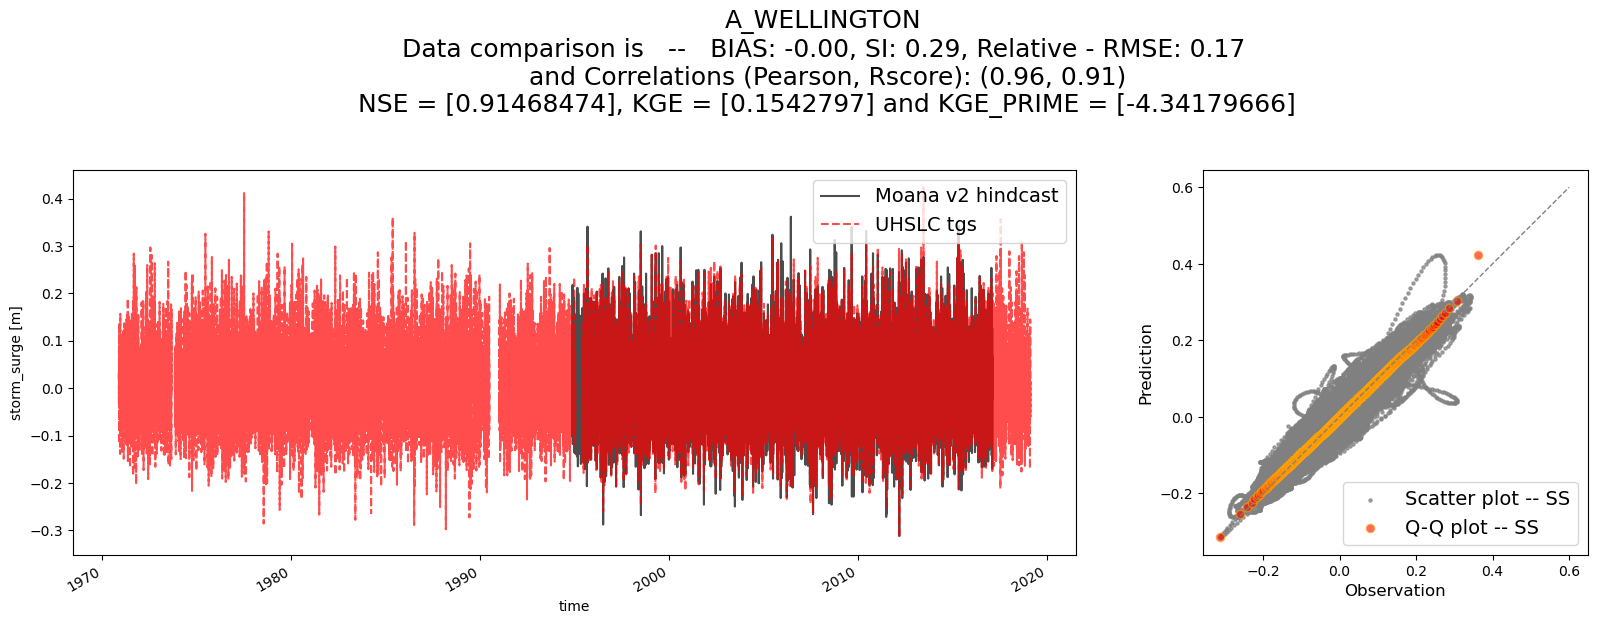

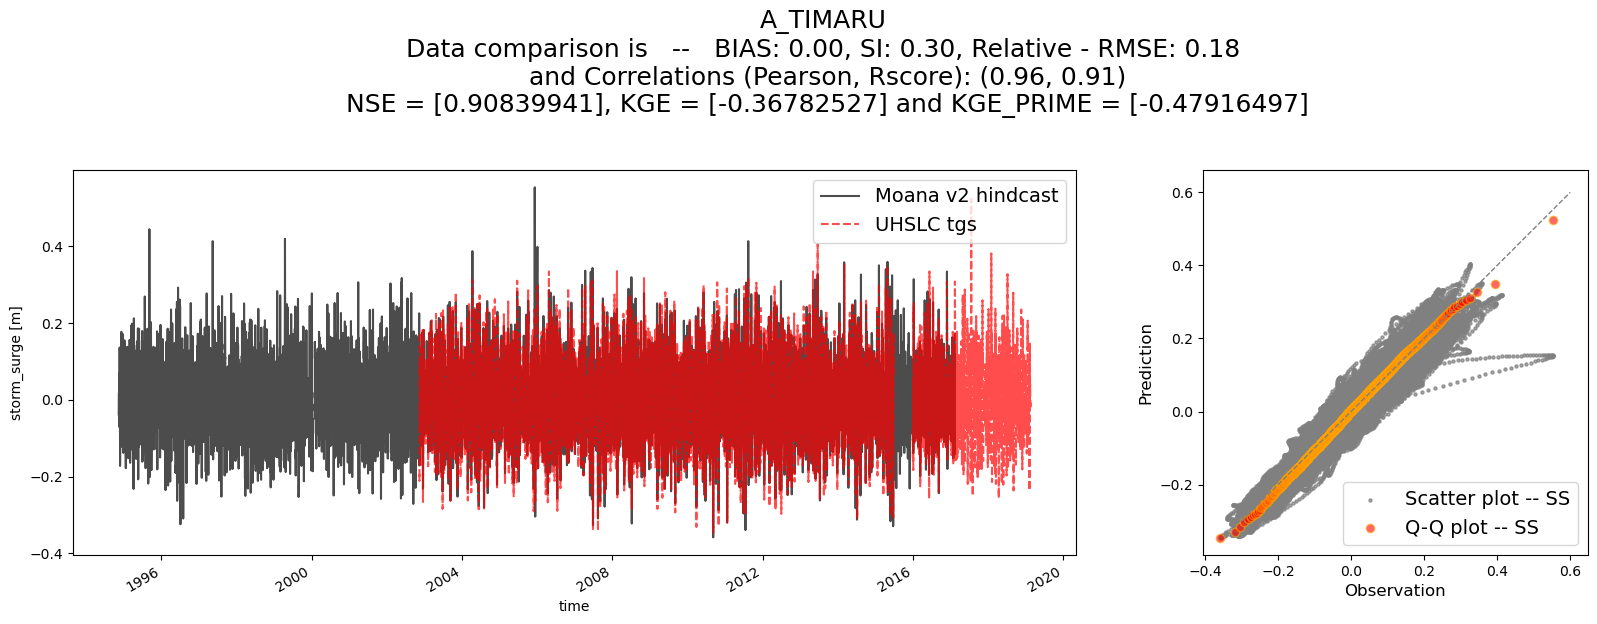

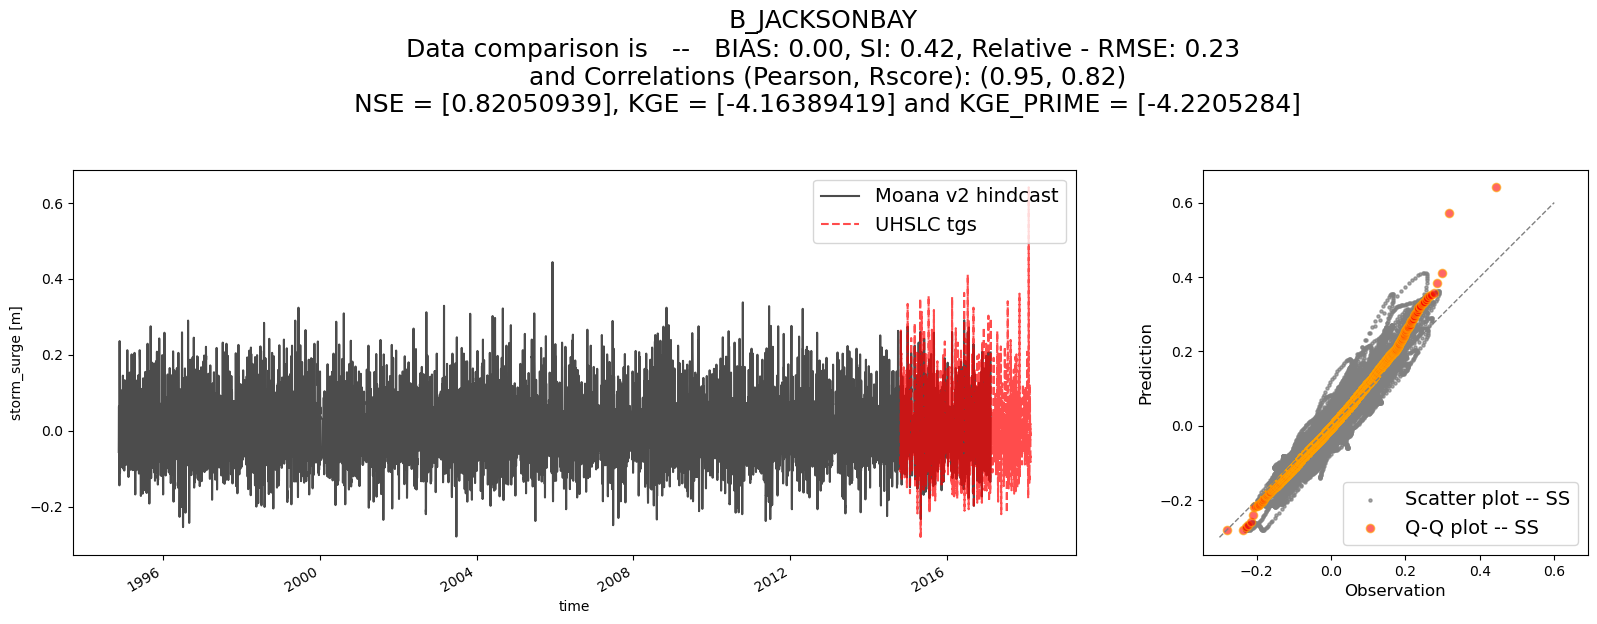

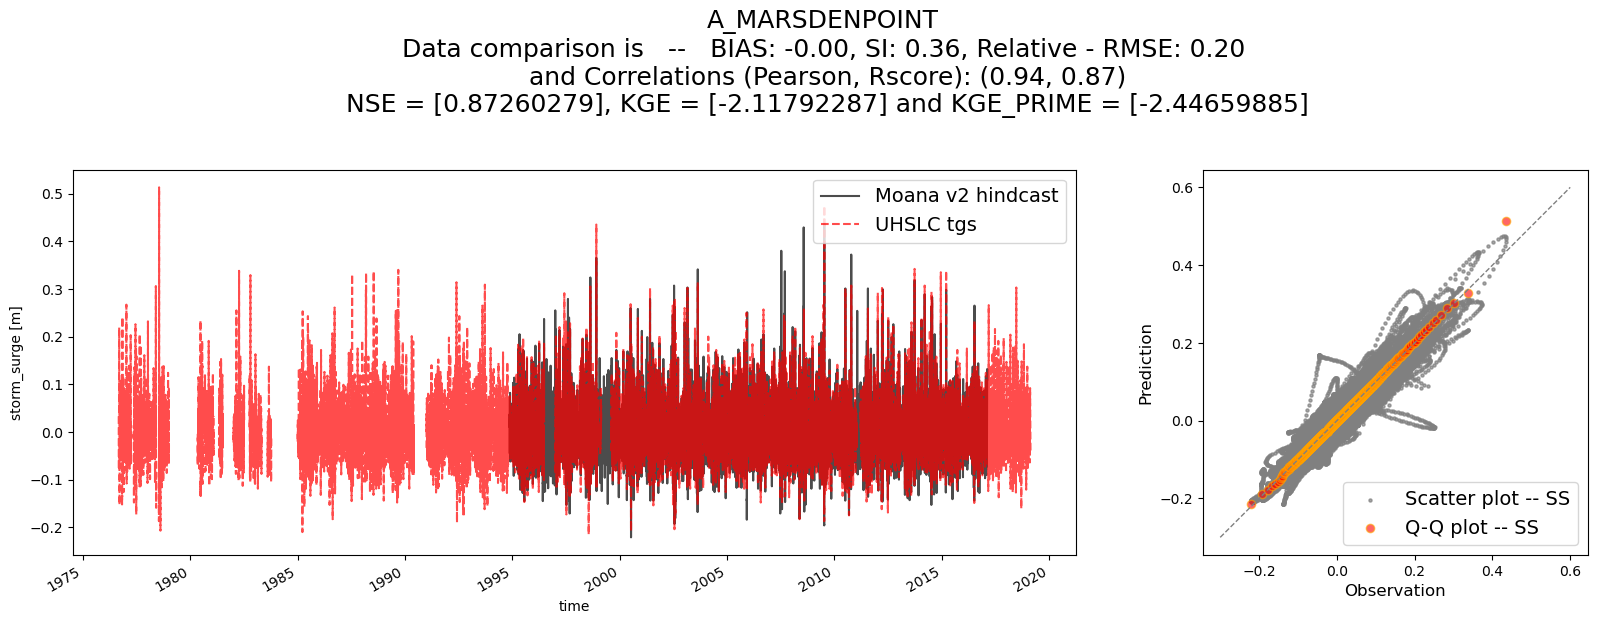

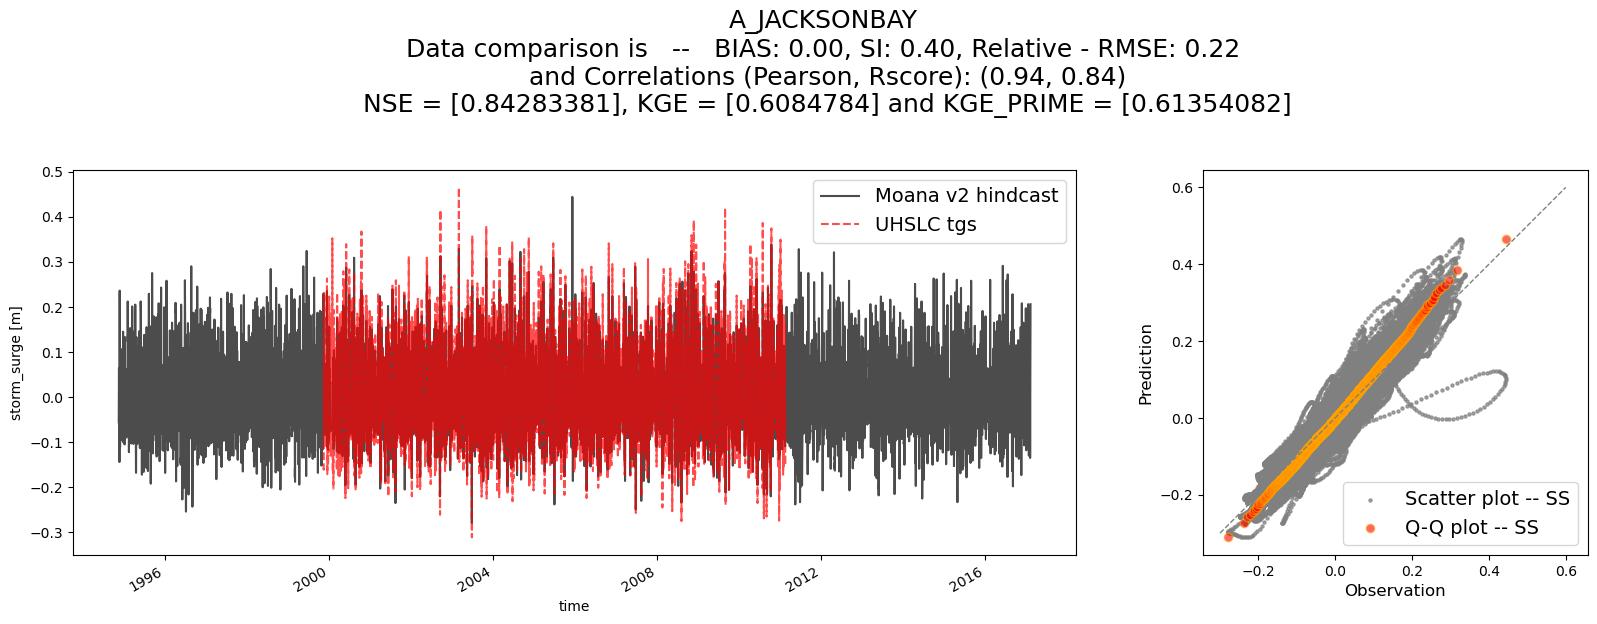

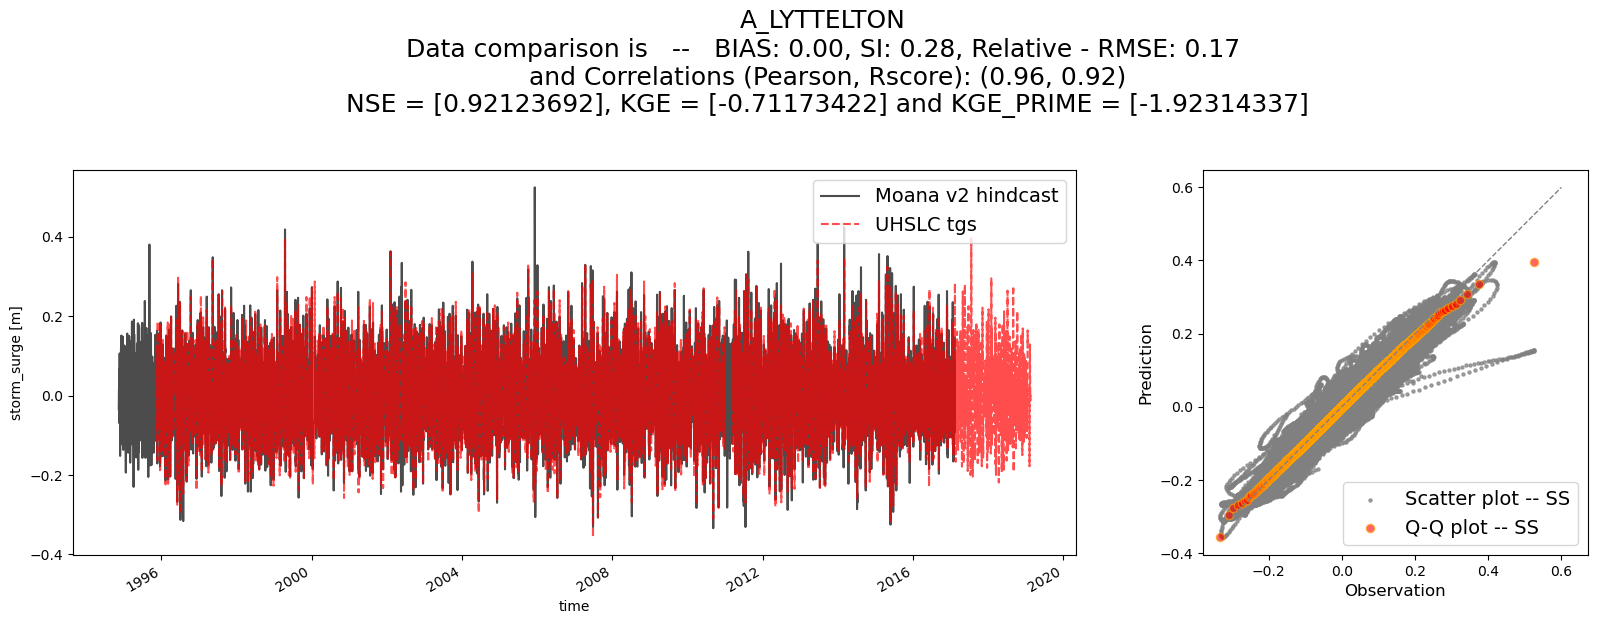

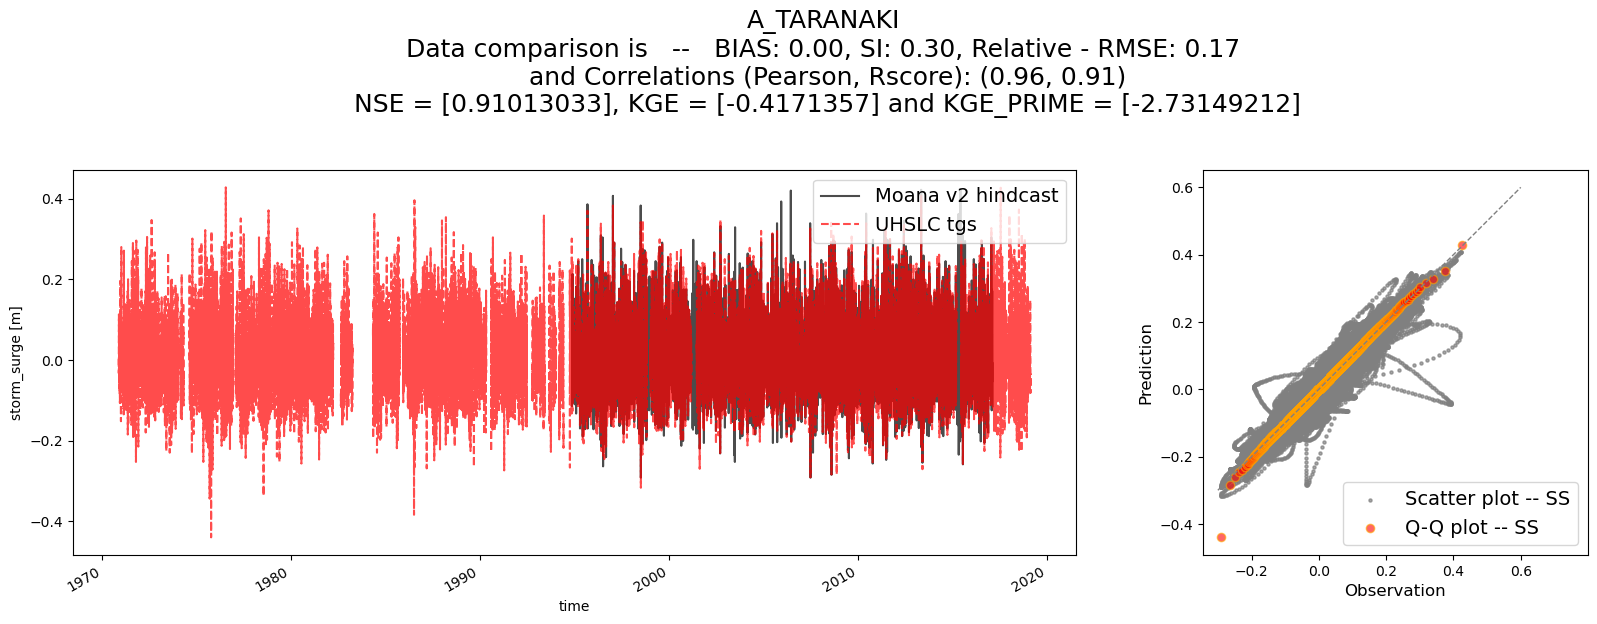

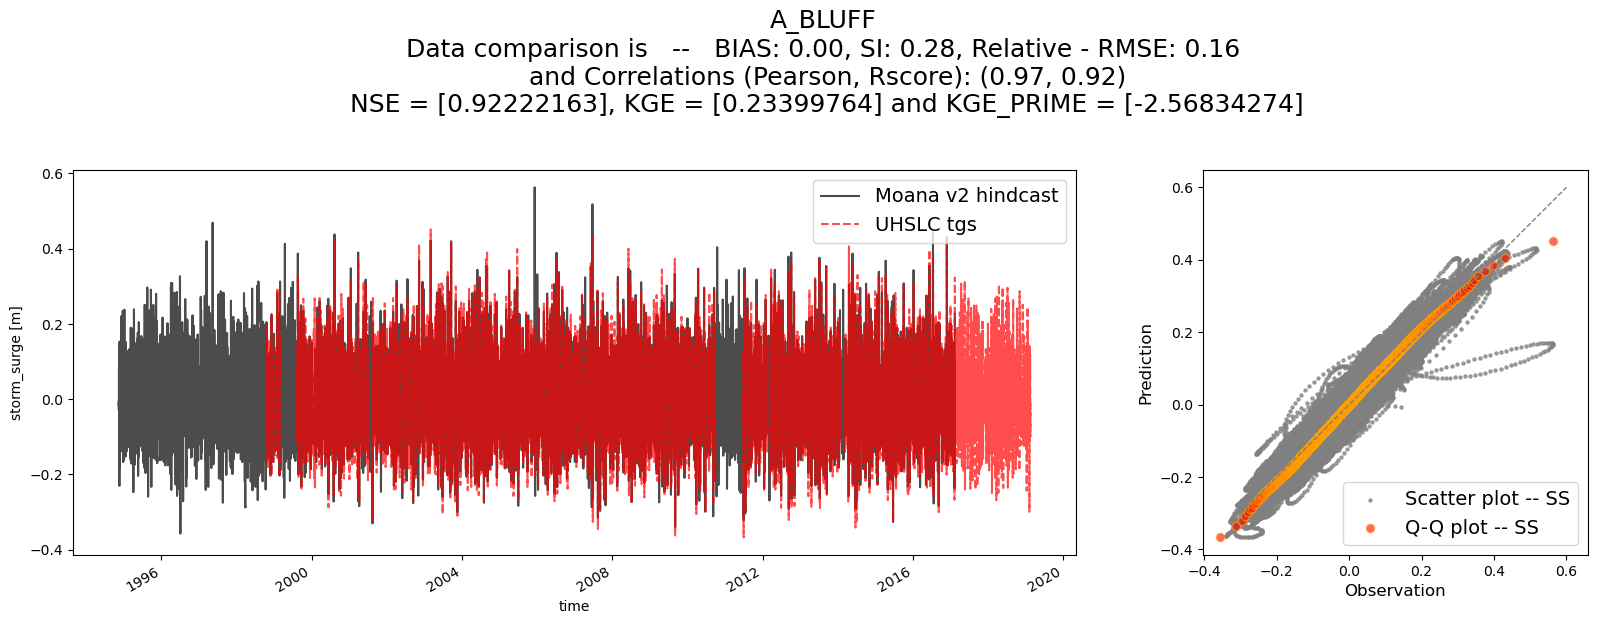

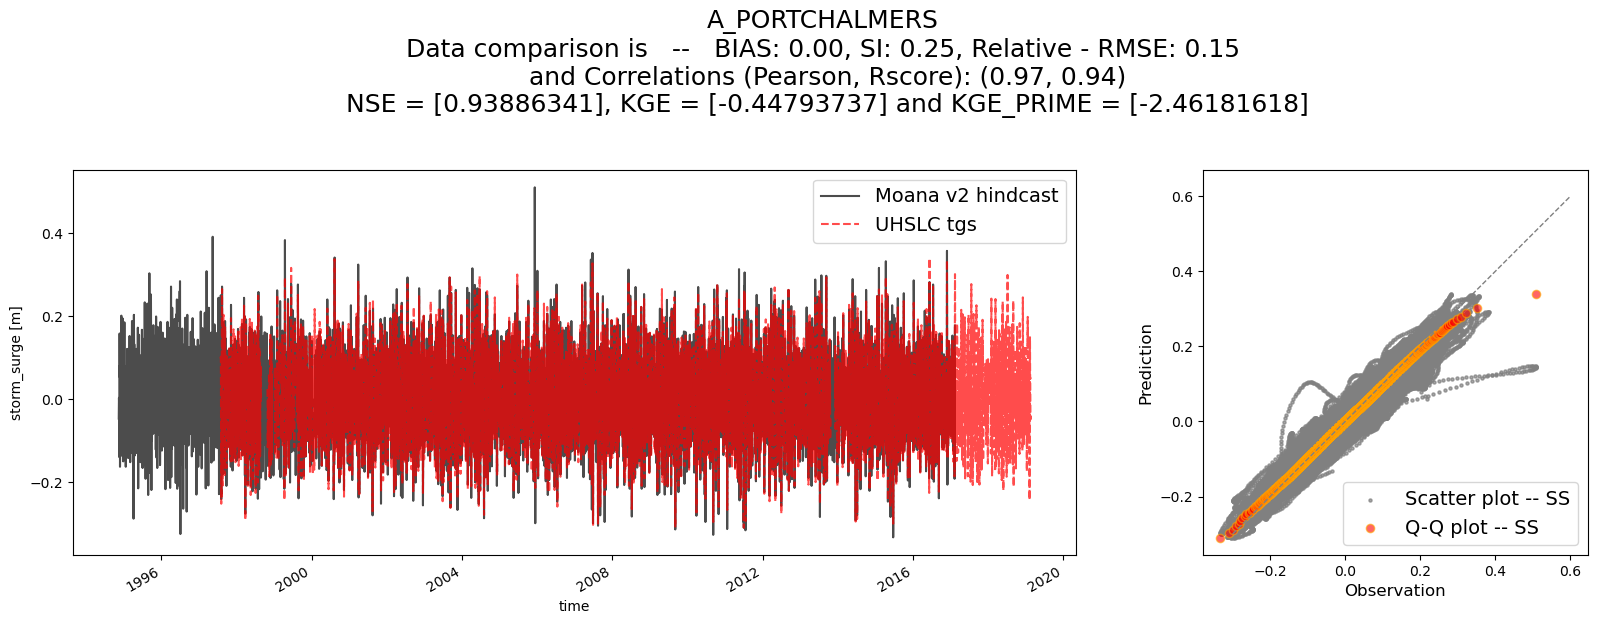

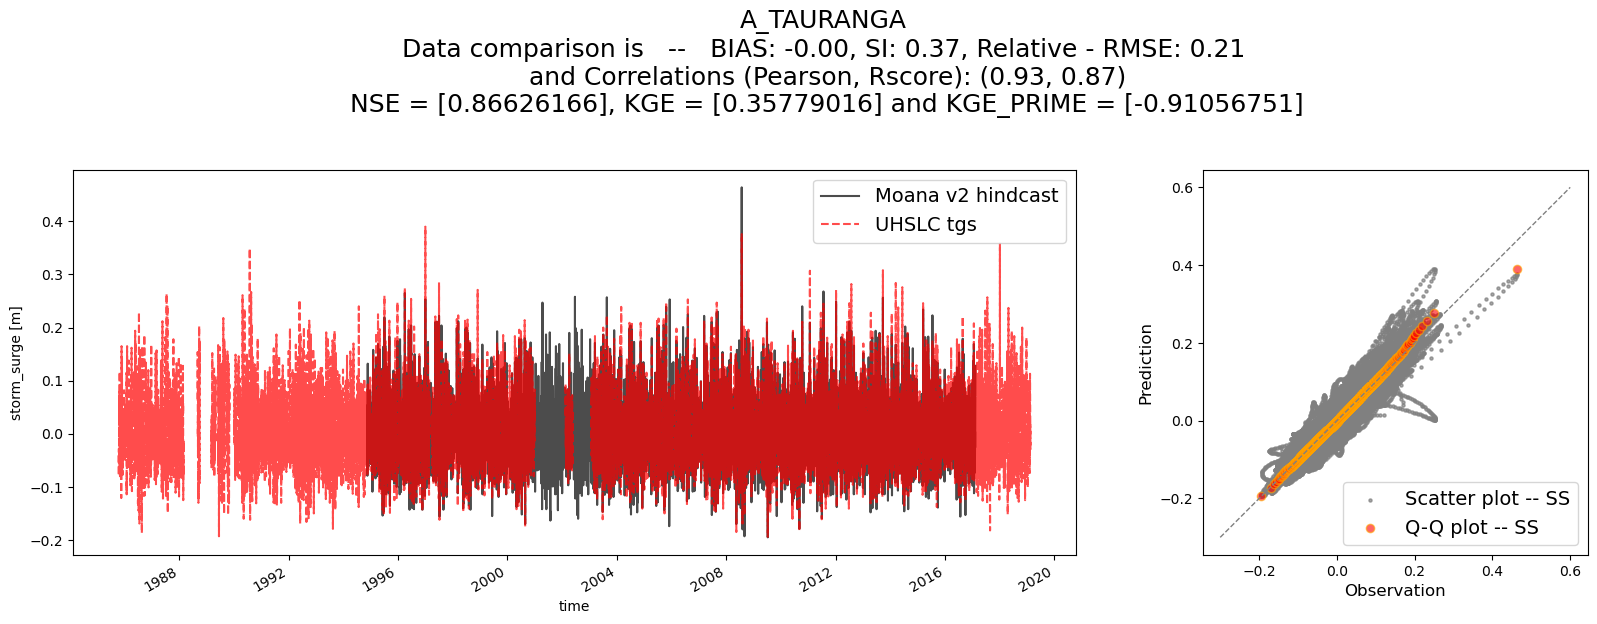

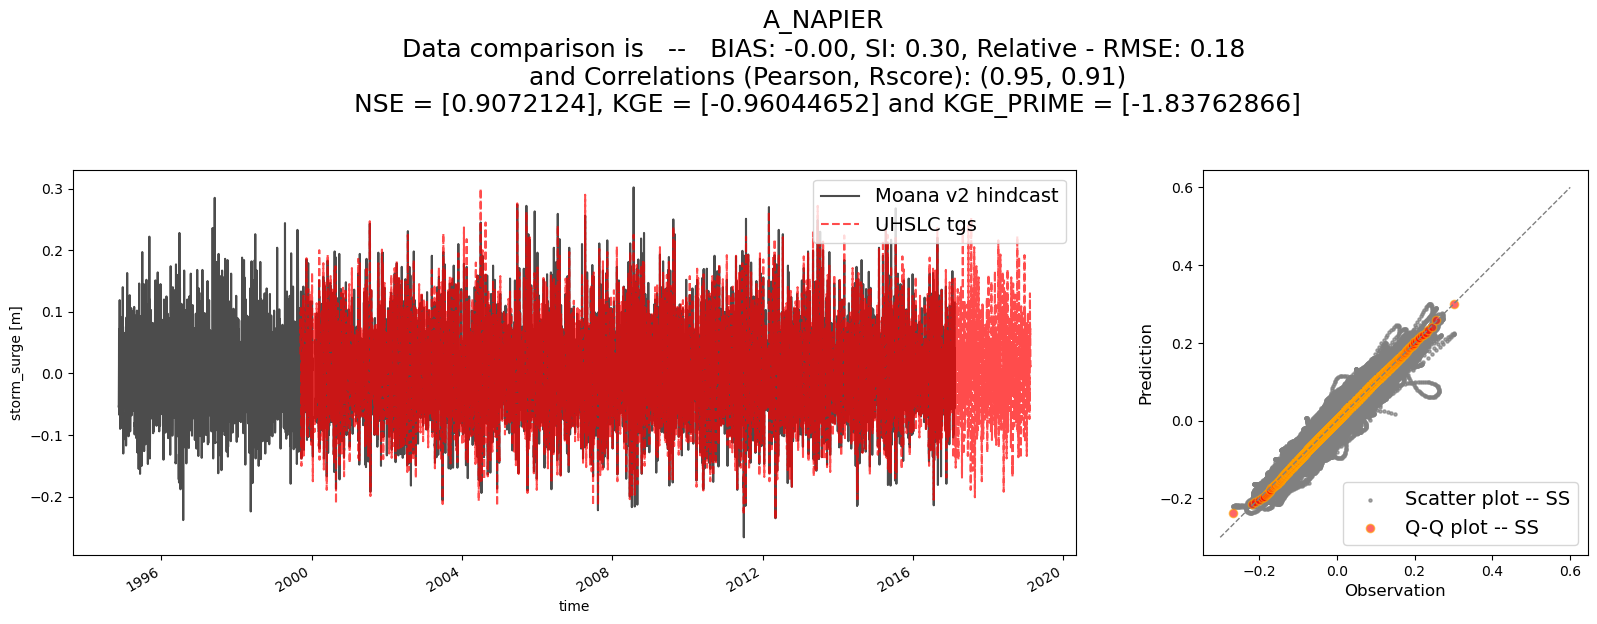

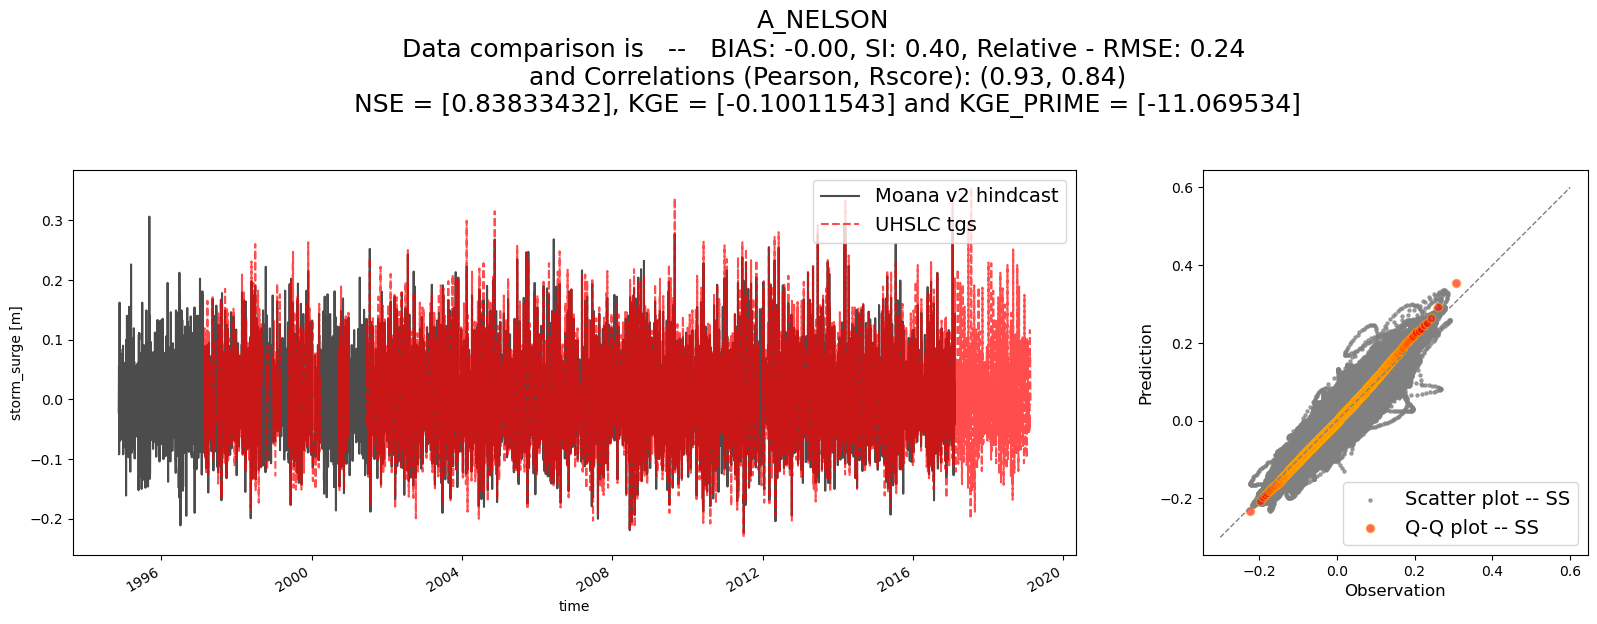

In [2]:
# load the data using the Loader class
load_cfsr_moana_uhslc = Loader(
    data_to_load=['cfsr','moana','uhslc'],
    time_resample='1D', load_winds=(True,None)
)
# validate the data
load_cfsr_moana_uhslc.validate_datasets(
    comparison_variables=[['ss'],['ss']]
)

In [3]:
# class attributes can be inspectioned below
load_cfsr_moana_uhslc

## Plot extra data

### GEV analysis (monthly)

As we are still trying to understand the data we will be using, let's plot some more data. In this case, let's plot the results of the Generalized-Extreme-Value analysis performed over all the nodes of the Moana hindcast, for 2 different months in the year. 

To refresh our memories, this probability density function is usually used to statistically represent the distribution of extreme events (in this case, monthly maxima), where the equation can take the following aspects:

$$
\boxed{
f(x)=\left\{\begin{matrix}
\exp\left [ -\left ( 1+\xi \frac{x^{(r)}-\mu}{\psi}{} \right )^{-\frac{1}{\xi}}_+ \right ] \cdot \prod_{k=1}^{r}\psi ^{-1}\exp \left ( -\frac{x^{(k)}-\mu}{\psi} \right )^{-1-\frac{1}{\xi}}_+ & \textrm{for } \xi\neq 0 \\ 
\exp\left [- \exp \left ( -\xi \frac{x^{(r)}-\mu}{\psi}{} \right ) \right ] \cdot \prod_{k=1}^{r}\psi ^{-1}\exp \left ( -\frac{x^{(k)}-\mu}{\psi} \right )
 & \textrm{for } \xi =  0
\end{matrix}\right.
}
$$

where $(a)_+ = max(0,a)$ and $\mu$ , $\psi$ y $\xi$ are the parameters of the GEV distribution. This parameters are estimated using the maximum likelihood estimation, which consists in finding the optimal parameters that maximizes the logarithm of the likelihood for the data:

$$
\boxed{
\theta^{\textrm{ opt}}=\underset{\theta}{\textrm{arg max }}L(\theta)
}
$$

more information can be found [here](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution)!!


 loading the Moana v2 hindcast data (ss)... 



N/A% (0 of 108) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--


 loading the Moana v2 hindcast data (ss)... 



100% (108 of 108) |######################| Elapsed Time: 0:01:59 Time:  0:01:59



 the GEV fit has improved 16 times by random/gumbel in cluster -1... 



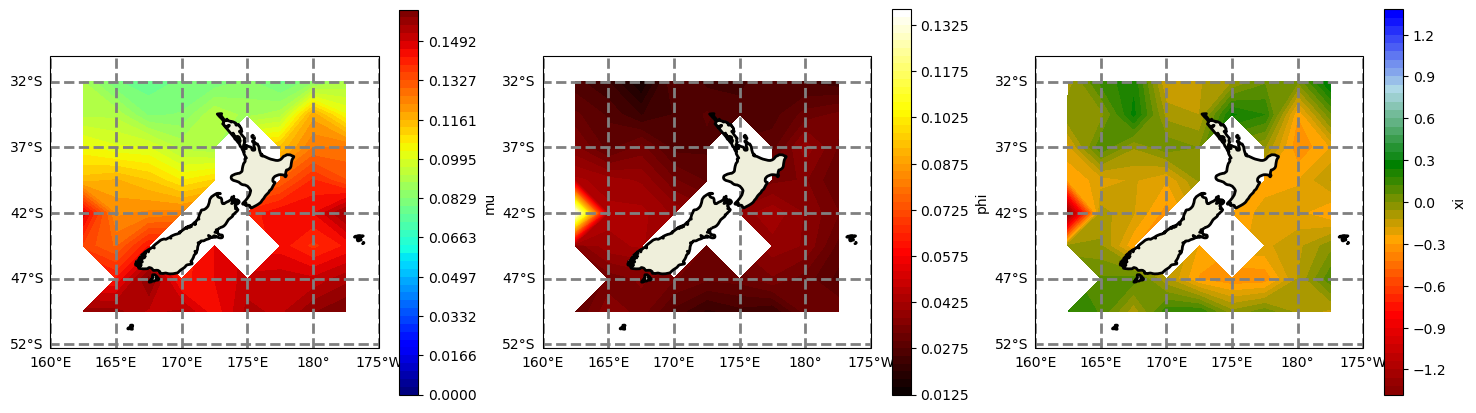

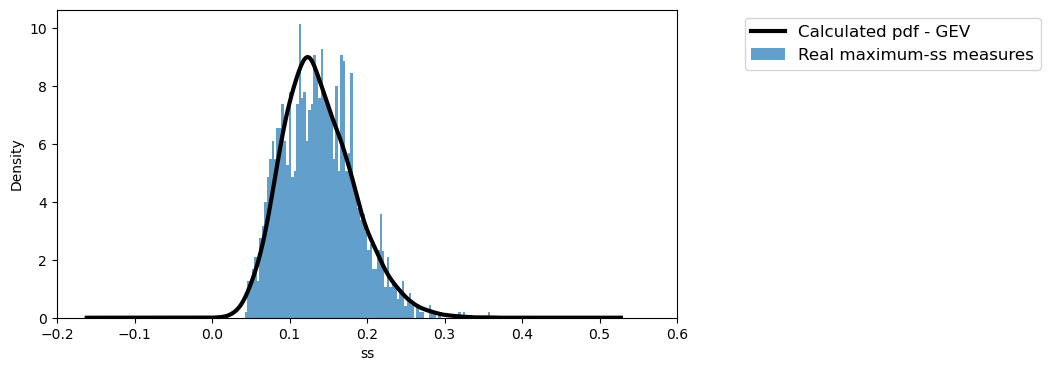


 loading the Moana v2 hindcast data (ss)... 



N/A% (0 of 108) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--


 loading the Moana v2 hindcast data (ss)... 



100% (108 of 108) |######################| Elapsed Time: 0:02:08 Time:  0:02:08



 the GEV fit has improved 9 times by random/gumbel in cluster -1... 



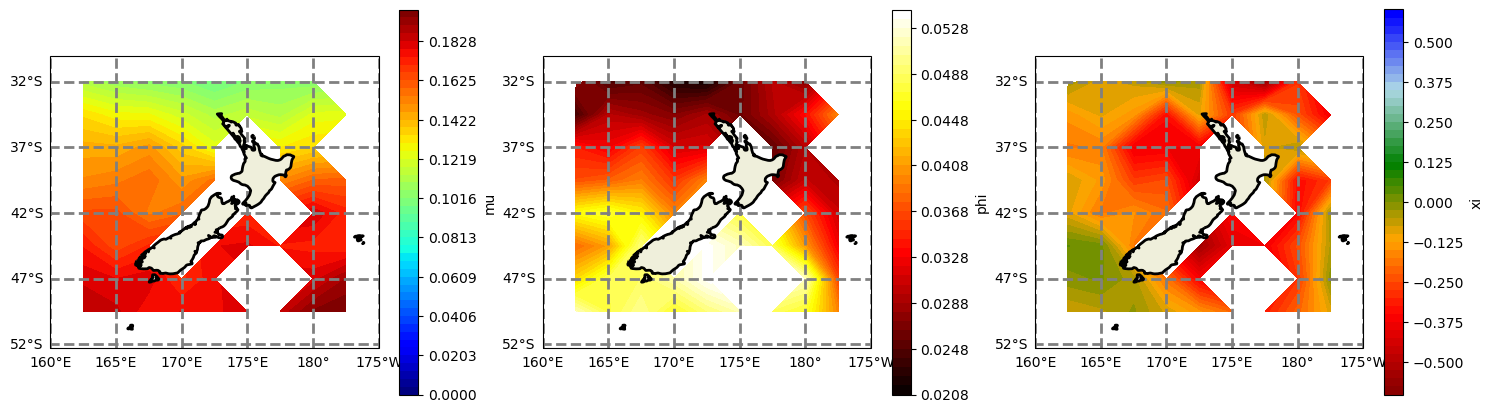

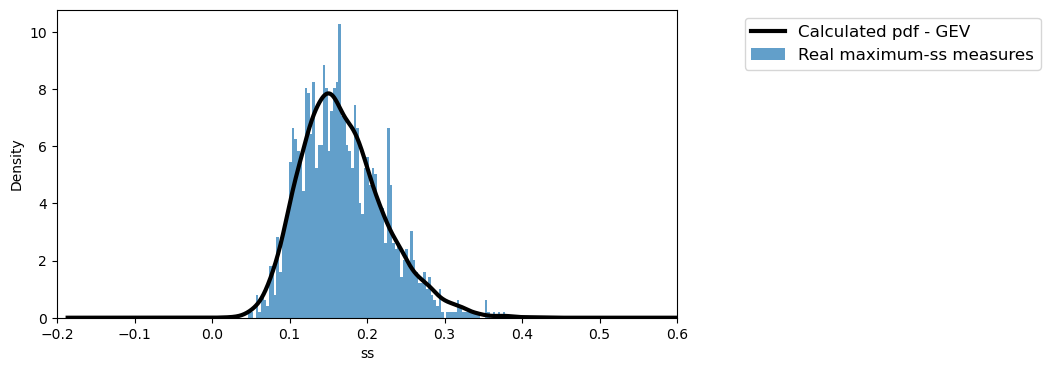

In [4]:
# perform gev analysis over stormsurge-monthly data
from sscode.statistical import gev_matrix
gev_data_list = []
for month in [2,10]: # select the months!!
    gev_data_list.append(gev_matrix(
        load_moana_hindcast_ss(daily=True).interp(
            lon=np.arange(160,190,2.5),
            lat=np.arange(-52,-30,2.5)
        ).isel(
            time=np.where(
                pd.to_datetime(
                    load_moana_hindcast_ss(daily=True).time.values
                ).month==month
            )[0]
        ).resample(time='1M').max(),'lon','lat',plot=True,
        gev_title='GEV parameters in month = {}'.format(month)
    )[['mu','phi','xi']].expand_dims(
        {'month':[month]}
    ))
save = False # save results
if save:
    xr.concat(gev_data_list,dim='month')\
        .to_netcdf('../data/statistics/stats_ss_gev_moana_monthly.nc')

### Projected winds + inverse barometer

Finally, we have calculated how the projected winds affect a location in New Zealand, and also the inverse barometer, which is a linear relation between the slp fields and the storm surge. Both results can be seen below:

In [7]:
# plot extra data if wanted
plot_extra_data = False
if plot_extra_data:
    from sscode.plotting.data import plot_winds, plot_pres_ibar
    plot_winds(load_cfsr_moana_uhslc.predictor_wind, 
               n_times=1, quiv_step=10) # projected winds
    plot_pres_ibar(load_cfsr_moana_uhslc.predictor_slp,
                   load_moana_hindcast_ss(daily=True)) # inverse barometer